# 3.7 事後予測

In [1]:
import pandas as pd
import numpy as np
from scipy import stats, special
import seaborn as sns
import warnings

from mylib.summarise import summarise_binom_beta

sns.set_theme()
warnings.simplefilter("ignore")

## a

In [2]:
# 先行実験の結果
n1 = 15
y1 = 2

# 事前分布のパラメータ
a = 1
b = 1

# thetaの事後分布
results_3_7_a = summarise_binom_beta(a=a, b=b, y=y1, n=n1, print_results=True)

Posterior Distributiion:
 	 beta(3, 14)
Posterior Mean:
 	 0.17647058823529413
Posterior Variance:
 	 0.008073817762399077
Posterior Mode:
 	 0.13333333333333333
95% Credible Interval:
 	 (0.0404737339059459, 0.38347623684926346)


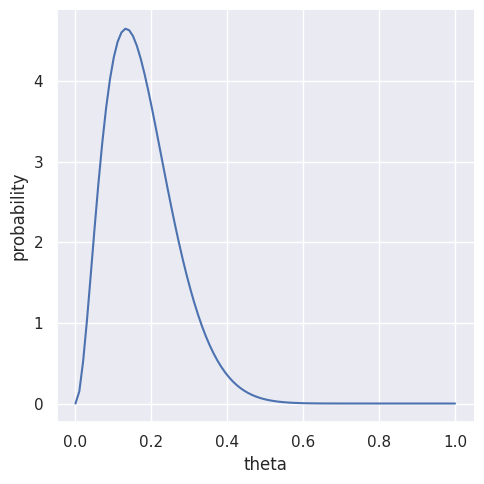

In [3]:
def plot_3_7_a():
    theta = np.linspace(0, 1, 100)
    df = pd.DataFrame(
        {
            "theta": theta,
            "probability": stats.beta.pdf(
                theta, a=results_3_7_a["a_posterior"], b=results_3_7_a["b_posterior"]
            ),
        }
    )
    sns.relplot(
        df,
        x="theta",
        y="probability",
        kind="line",
    )


plot_3_7_a()

## b

In [4]:
# 特別教育クラスの子供の数
n2 = 278

### i.

条件付き確率 $Pr(Y_2 = y_2 | Y_1 = y_1)$ は一般に

$$
Pr(Y_2 = y2 | Y_1 = y_1)
=
\int^{1}_{0} Pr(Y_{2} = y_{2} |Y_1 = y_1, \theta ) p(\theta|Y_1=2) d\theta
$$

と書ける。よって、
等式

$$
Pr(Y_2 = y2 | Y_1 = 2)
=
\int^{1}_{0} Pr(Y_{2} = y_{2} | \theta ) p(\theta|Y_1=2) d\theta
$$

が成り立つためには、

$$
Pr(Y_{2} = y_{2} |Y_1 = y_1, \theta )
=
Pr(Y_{2} = y_{2} | \theta ) 
\\
\Leftrightarrow
Pr(Y_{2} = y_{2} ,Y_1 = y_1| \theta )
=
Pr(Y_{2} = y_{2} | \theta )
Pr(Y_{1} = y_{1} | \theta )
$$

つまり、$\theta$ で条件付けたときに $Y_1, Y_2$ が条件付き独立であることが必要となる。

### ii. , iii.

それぞれの分布関するは以下のようになる。

$$
\begin{aligned}
Pr(Y_2 = y_2 | \theta) &= dbinom(y_2, n=n_2, p=\theta) \\
&= \binom{n_2}{y_2} \theta ^{y_2} (1 - \theta) ^{n_2 - y_2} \\
p(\theta | Y_1 = 2) &= dbeta(\theta, a=y_1 + 1, b=n_1 - y_1 + 1) \\
&= dbeta(\theta, a=3, b=14) \\
&= \frac{1}{B(3, 14)} \theta ^{2} (1 - \theta)^{13}
\end{aligned}
$$

これより、積分を実行する。

$$
\begin{aligned}
Pr(Y_2 = y2 | Y_1 = 2)
&= \int^{1}_{0} Pr(Y_{2} = y_{2} | \theta ) p(\theta|Y_1=2) d\theta \\
&= \binom{n_2}{y_2} \frac{1}{B(3, 14)} \int^{1}_{0} \theta ^{y_2 + 3 - 1} (1-\theta)^{n_2 - y_2 + 14 -1} d\theta \\
&= \binom{n_2}{y_2} \frac{B(y_2 + 3, n_2 - y_2 + 14)}{B(3, 14)}
\end{aligned}
$$

この計算が合っているかを確認する。

In [5]:
def pmf_y2_3_7(y2, n2=278):
    return (
        special.binom(n2, y2) * special.beta(y2 + 3, n2 - y2 + 14) / special.beta(3, 14)
    )

In [6]:
df_3_7_b = pd.DataFrame()
df_3_7_b["y2"] = np.arange(1, 278 + 1)
df_3_7_b["proba"] = df_3_7_b["y2"].apply(pmf_y2_3_7)

display(df_3_7_b.iloc[np.hstack([np.arange(5), np.arange(5) - 5])])

# 確率の和がほぼ1になっているか確認
df_3_7_b[["proba"]].sum()

,y2,proba
0,1,3.828376e-04
1,2,7.313517e-04
2,3,1.164089e-03
3,4,1.667315e-03
4,5,2.228509e-03
273,274,9.189968e-19
274,275,2.178071e-19
275,276,4.113477e-20
276,277,5.524237e-21
277,278,3.974271e-22


proba    0.999866
dtype: float64

確率の和がほぼ1になっているのでたぶん大丈夫

## c

TBW

## d

TBW